In [1]:
import flor

records = flor.log_records()
pivot = flor.full_pivot(records)
pivot

STEPPING IN 19da6ffd24d2f1bce3429b3e10afa24a8c157883
STEPPING IN 1b871e091b71b189fa4d46caf4c1bf4b9ef23127
STEPPING IN 3a6b7d42a32c7549c29cd756b99f92f43efffc92
STEPPING IN e18ae00723173efead42462d68ac15fedf74a625
STEPPING IN b211cd93d215685fd9a24e8239571ffe8ea04132
STEPPING IN bf5c108663d4e55129e070aba58417d822131f85
STEPPING IN 41258f60e0bb6f9ef595e82bd4b92004bcc5da9d
STEPPING IN d152a31d82326de5b88f13ae9dacb9bb0d1150c7
STEPPING IN d10077e726a08e5fa3d24c2aa9a3bbcf18b13222
STEPPING IN a524545648733cac12474d835b137c477c98df90
STEPPING IN a00abf056c171b986b7118327663deda04920253
STEPPING IN 489cc9ed62171303b387063db1bed5f6f89c98b4
STEPPING IN 8ef61f6e92e011ab3371bcc6a457f4e53c49c9c7
STEPPING IN 10f27eddd80ff8bcc41f7fc18402ce85286b101e
STEPPING IN 29b259c569b6111fe9c3cfbc13484000d9b8677a
STEPPING IN f8015774e9c1e44c75fb13bcf52c4d819cab0337
STEPPING IN 903923d375e10e72b1631feaf36f958baec04f2a
STEPPING IN 44e6bc46312380a772a0dd4e1a5e2da7b2178b16
STEPPING IN 047c19316d5d2abb3ac1845a9109bdf607

,projid,runid,tstamp,vid,epoch,step_cap,loss,weight_decay,lr,batch_size,epochs,acc
0,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-24 17:27:49,6691ddf9b80dde4b2686633b266df9ed45f4d223,1,1000.0,5.90376615524292,0.0001,1e-06,4,10,1.716
1,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-24 17:27:49,6691ddf9b80dde4b2686633b266df9ed45f4d223,2,1000.0,6.708034038543701,0.0001,1e-06,4,10,1.716
2,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-24 17:27:49,6691ddf9b80dde4b2686633b266df9ed45f4d223,3,1000.0,6.404563903808594,0.0001,1e-06,4,10,1.716
3,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-24 17:27:49,6691ddf9b80dde4b2686633b266df9ed45f4d223,4,1000.0,6.879299640655518,0.0001,1e-06,4,10,1.716
4,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-24 17:27:49,6691ddf9b80dde4b2686633b266df9ed45f4d223,5,1000.0,6.628185272216797,0.0001,1e-06,4,10,1.716
...,...,...,...,...,...,...,...,...,...,...,...,...
371,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-25 23:25:56,19da6ffd24d2f1bce3429b3e10afa24a8c157883,6,1000.0,4.504988670349121,1e-05,0.001,32,10,15.798
372,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-25 23:25:56,19da6ffd24d2f1bce3429b3e10afa24a8c157883,7,1000.0,4.690465927124023,1e-05,0.001,32,10,15.798
373,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-25 23:25:56,19da6ffd24d2f1bce3429b3e10afa24a8c157883,8,1000.0,3.949106216430664,1e-05,0.001,32,10,15.798
374,xp-resnet152_flor.shadow.sigmod,BATCH,2023-05-25 23:25:56,19da6ffd24d2f1bce3429b3e10afa24a8c157883,9,1000.0,4.565378189086914,1e-05,0.001,32,10,15.798


In [7]:
len(pivot['vid'].drop_duplicates())

40

In [ ]:
# Index Scan (--replay_flor)
flor.replay(
    apply_vars=['dp', 'dp_str'], 
    where_clause=None, 
    path='train.py')

In [ ]:
# Range Scan (--replay_flor 3 / 3)
flor.replay(
    apply_vars=['dp_i'], 
    where_clause='epoch > 8 and epoch <= 10', 
    path='train.py')

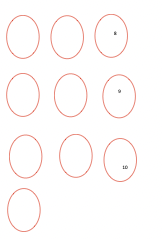

In [ ]:
# Full Scan (--replay_flor 1/1) V ((--replay_flor 1/2) + (--replay_flor 2/2)) V ...
#   parallelizable
flor.replay(
    apply_vars=['dp_i', 'dp', 'dp_str'], 
    where_clause=None, 
    path='train.py')

In [ ]:
# Index Lookup (--replay_flor 0/1 or --replay_flor i/EPOCHS)
flor.replay(
    apply_vars=['dp_str'], 
    where_clause=None, 
    path='train.py')

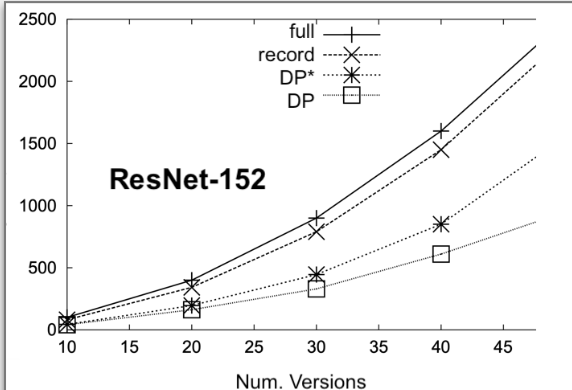

For this I only need to measure dp_str and dp
So a simple index scan should do. 
I should make sure flor reports time accurately for dp and dp_str

In [ ]:
# Index Scan (--replay_flor)
flor.replay(
    apply_vars=['dp', 'dp_str'], 
    where_clause=None, 
    path='train.py')